In [3]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
# loading the data
data = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)

In [5]:
# Spliting the data into train and test data
X = data.headline.values
y = data.is_sarcastic.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [6]:
# parameters
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [8]:
training_sequences = tokenizer.texts_to_sequences(X_train)
train_pad = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
test_pad = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAvgPool1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
__________________________________________________

In [11]:
num_epochs = 30
history = model_1.fit(train_pad, y_train, epochs=num_epochs, validation_data=(test_pad, y_test), verbose=2)

Epoch 1/30
668/668 - 3s - loss: 0.6852 - accuracy: 0.5599 - val_loss: 0.6770 - val_accuracy: 0.5610 - 3s/epoch - 5ms/step
Epoch 2/30
668/668 - 2s - loss: 0.5518 - accuracy: 0.7388 - val_loss: 0.4216 - val_accuracy: 0.8298 - 2s/epoch - 3ms/step
Epoch 3/30
668/668 - 2s - loss: 0.3887 - accuracy: 0.8436 - val_loss: 0.3610 - val_accuracy: 0.8489 - 2s/epoch - 4ms/step
Epoch 4/30
668/668 - 2s - loss: 0.3253 - accuracy: 0.8742 - val_loss: 0.3390 - val_accuracy: 0.8559 - 2s/epoch - 3ms/step
Epoch 5/30
668/668 - 2s - loss: 0.2875 - accuracy: 0.8954 - val_loss: 0.3310 - val_accuracy: 0.8607 - 2s/epoch - 4ms/step
Epoch 6/30
668/668 - 2s - loss: 0.2510 - accuracy: 0.9115 - val_loss: 0.3315 - val_accuracy: 0.8579 - 2s/epoch - 4ms/step
Epoch 7/30
668/668 - 2s - loss: 0.2263 - accuracy: 0.9206 - val_loss: 0.3411 - val_accuracy: 0.8562 - 2s/epoch - 4ms/step
Epoch 8/30
668/668 - 2s - loss: 0.2049 - accuracy: 0.9323 - val_loss: 0.3481 - val_accuracy: 0.8562 - 2s/epoch - 4ms/step
Epoch 9/30
668/668 - 2s 

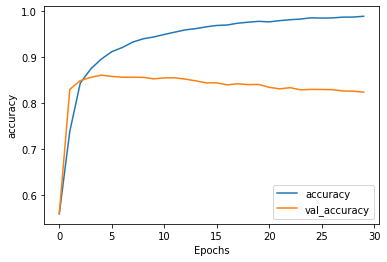

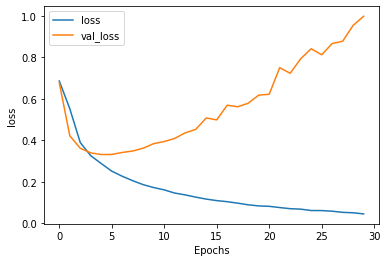

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model_1.predict(padded))

[[0.9705561 ]
 [0.00492471]]


In [14]:
sentence = ["Man With No Friends Plans Makeshift Friendsgiving With Family Members Instead", "South Africa Braces For COVID-19 Wave Propelled By Omicron"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model_1.predict(padded))

[[0.9999878]
 [1.       ]]
